In [1]:
import numpy as np
import seaborn as sns
import numpy.random as rd
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math
import scipy.stats as st

Дано: $x_1, \ x_2, \ldots, x_n \ \sim	 N(a,\sigma)$ . Требуется:
1) Продемонстрировать состоятельность выборочной дисперсии по определению.

2) Продемонстрировать, что выборочная дисперсия нормального распределения имеет распределение хи-квадрат:
$$n\frac{s^2_n}{\sigma^2} \sim \chi^2(n-1)$$

Начнем с первого задания. Выборочная характеристика $\theta_n$ является состоятельной оценкой генеральной характеристики $\theta$, если 
$$\theta_n \xrightarrow[n\rightarrow \infty]{P} \theta$$

Для того, чтобы доказать сходимость по вероятности, достаточно доказать среднеквадратичную сходимость:

$$E(\theta_n-\theta)^2\xrightarrow[n\rightarrow \infty]{} 0$$

Ее мы можем смоделировать. Фиксируем конкретное $n$, генерируем несколько выборок, на каждой из них считаем среднеквадратическое отклонение, по этим данным сможем посчитать матожидание. Далее увеличим $n$ и проделаем все то же самое.\
Таким образом, получим набор нужных матожиданий при увеличивающихся $n$, все это для разных $\sigma, a$. Если будет видно, что они стремятся к 0, то мы подтвердили гипотезу.

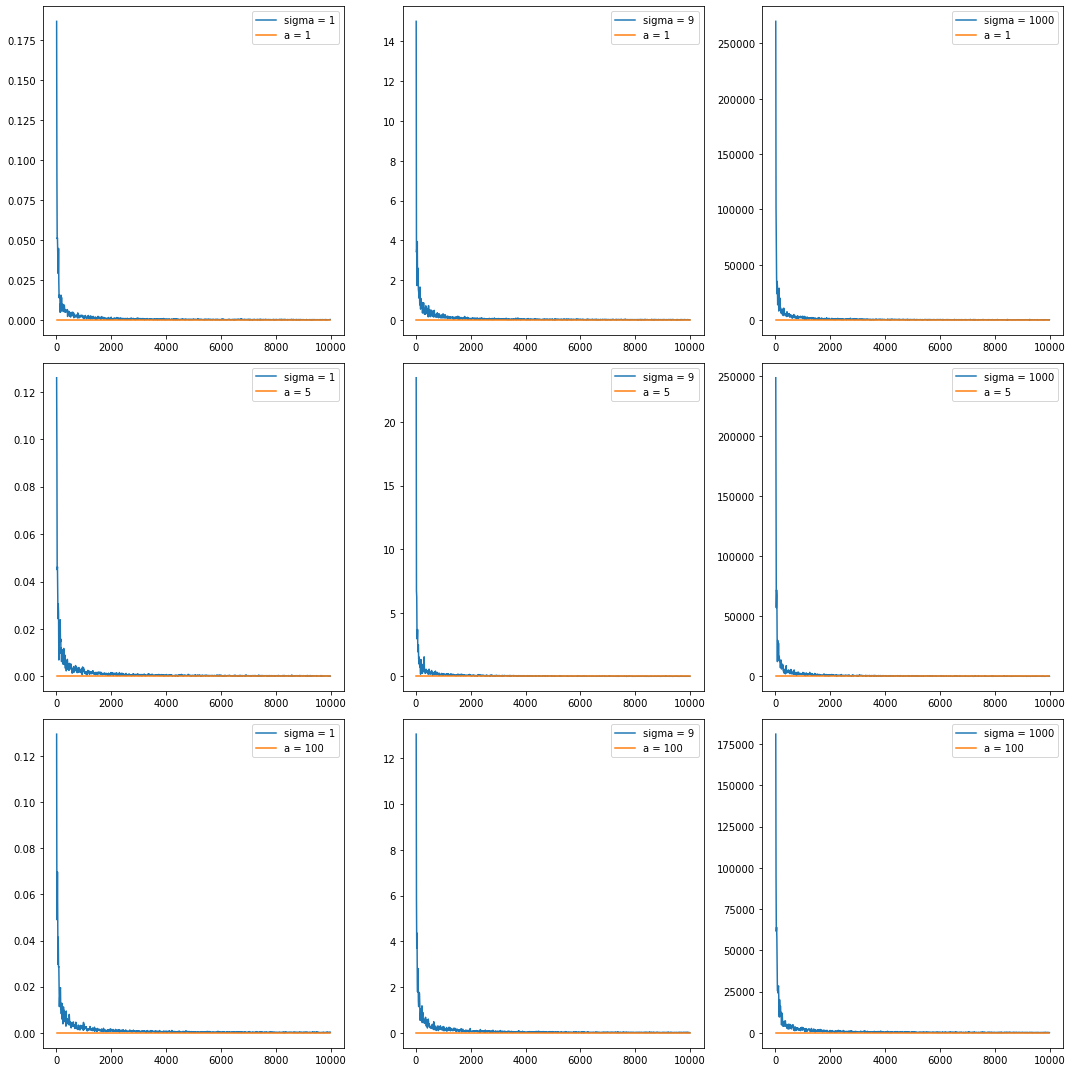

In [82]:
cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(15, 15))
z = 1
for j, a in enumerate([1, 5, 100]):
    for i, sigma in enumerate([1, 9, 1000]):
#различные значения n
        n_values = range(10, 10000, 10)
        e = []
        for n in n_values:
            l = 20 #количество выборок, на которых считаем выборочную дисперсию
            samples = np.zeros(shape=(l, n))
            d = np.zeros(l)
            for k in range(l):
                samples[k] = st.norm(loc= a, scale=np.sqrt(sigma)).rvs(size=n) #генерируем разные выборки
                d[k] = np.var(samples[k])
            d = (d - sigma)**2
            e.append(np.mean(d))
    #print(e)
        plt.tight_layout()
        plt.subplot(3, 3, z)
        z += 1
        plt.plot(n_values, e, label='sigma = '+str(sigma)) #строим графики
        plt.plot(n_values, [0]*len(n_values), label="a = "+str(a)) #прямая, чтобы было понятнее сремление к 0
        plt.legend()
    
None

Сходимость действительно видна из графиков, значит утверждение доказано.

Перейдем ко второму заданию. Чтобы продемонстрировать, что утверждение верно, рассмотрим выборочную функцию распределения и функцию распределения $\chi^2$. Рассмотрим их при каком-то фиксированном $n$ (дабы не плодить слишком много графиков) и разных $a, \sigma$. Совпадают - значит утверждение доказано.

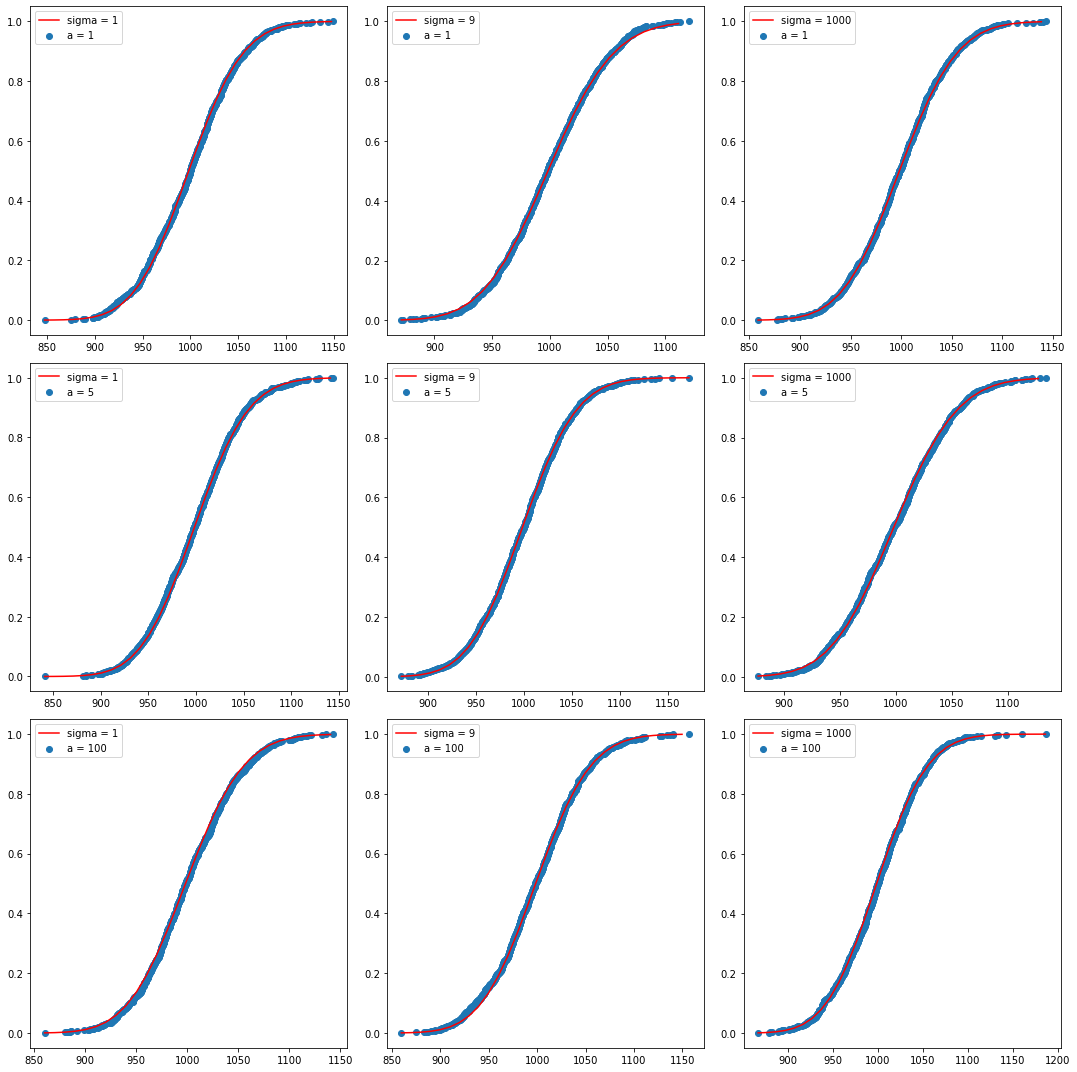

In [226]:
plt.figure(figsize=(15, 15))
z = 1
for j, a in enumerate([1, 5, 100]):
    for i, sigma in enumerate([1, 9, 1000]):
#различные значения n
        n_values = [1000]
        for n in n_values:
            l = n #количество выборок, на которых считаем выборочную дисперсию
            samples = np.zeros(shape=(l, n))
            d = np.zeros(l)
            for k in range(l):
                samples[k] = st.norm(loc=a, scale=sigma).rvs(size=n) #генерируем разные выборки
                d[k] = np.var(samples[k])*n/sigma**2   #значения 
#print(d)
            custm = st.rv_discrete(name='custm', values=(sorted(d), [1/l]*l)) #наше выборочное распределение s_n
            plt.tight_layout()
            plt.subplot(3, 3, z)
            z += 1
            plt.scatter(d, custm.cdf(d), label="a = "+str(a))
            x = np.arange(min(d), max(d), 10)
            plt.plot(x, st.chi2.cdf(x, df=len(d)-1), color='r', label='sigma = '+str(sigma))
        #plt.plot(n_values, e, label='sigma = '+str(sigma)) #строим графики
        #plt.plot(y, custm.cdf(y))
            plt.legend()


Из всего приведенного выше анализа можно сделать вывод, что распределения по всей видимости действительно совпадают.